In [148]:
pip install split-folders


In [149]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [150]:
IMAGE_SIZE = (224, 224)

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
!ls '/content/drive'


MyDrive


In [153]:
import splitfolders
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
folders = ['G', 'H', 'K', 'M']
source_dir = '/content/drive/MyDrive/trainingData/trainingData/'
train_dir = '/content/drive/MyDrive/trainingData/trainingData/Train/'
test_dir = '/content/drive/MyDrive/trainingData/trainingData/Test/'


for folder in folders:
   source_folder = os.path.join(source_dir, folder)
   train_folder = os.path.join(train_dir, folder)
   test_folder = os.path.join(test_dir, folder)

   # Get a list of all image files
   image_files = os.listdir(source_folder)

   # Split the list of image files into training and test sets
   train_files, test_files = train_test_split(image_files, test_size=0.25, random_state=42)

   # Create the training and test directories if they don't exist
   os.makedirs(train_folder, exist_ok=True)
   os.makedirs(test_folder, exist_ok=True)

   # Copy the training and test images to the corresponding directories
   for file in train_files:
      shutil.copy(os.path.join(source_folder, file), os.path.join(train_folder, file))

   for file in test_files:
      shutil.copy(os.path.join(source_folder, file), os.path.join(test_folder, file))

In [154]:
#Give dataset path
train_path = '/content/drive/MyDrive/trainingData/trainingData/Train'
test_path = '/content/drive/MyDrive/trainingData/trainingData/Test'

Working with 51 images
Image examples: 


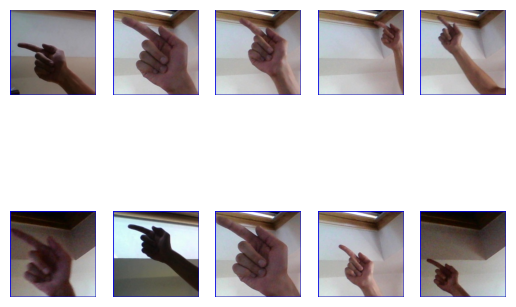

In [155]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# creating a object


folder = train_path+'/G'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")

# Create a figure with a 2x5 grid of subplots
fig, ax = plt.subplots(2, 5)

# Assuming onlybenignfiles contains the paths to your images
for i in range(10):
  img = mpimg.imread(folder + "/" + onlybenignfiles[i])
  # Flatten the array of axes to access each subplot
  ax_flat = ax.flatten()
  ax_flat[i].imshow(img)
  ax_flat[i].axis('off') # Hide axes

plt.show()


#for i in range(10):
 #   print(onlybenignfiles[i])
  #  display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [156]:
folders = glob('/content/drive/MyDrive/trainingData/trainingData/Train/*')
print(len(folders))

4


In [157]:
from keras.applications import MobileNetV2

mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

for layer in mobilenet.layers:
 layer.trainable = False

x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=prediction)

model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_6[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [158]:
#vgg = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=True)


In [159]:
#vgg.input

In [160]:
#for layer in vgg.layers:
 # layer.trainable = False

In [161]:
#vgg = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
#x = Flatten()(vgg.output)
#prediction = Dense(len(folders), activation='softmax')(x)
#model = Model(inputs=vgg.input, outputs=prediction)
#model.summary()

In [162]:

import keras
from keras import optimizers

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
   initial_learning_rate=0.01,
   decay_steps=10000,
   decay_rate=0.9)

adam = optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])


In [163]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [164]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [165]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

Found 139 images belonging to 4 classes.


In [166]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 58 images belonging to 4 classes.


In [167]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                           verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history = model.fit(
 train_set,
 validation_data=test_set,
 epochs=50,
 callbacks=callbacks,
 verbose=2)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/50

Epoch 1: val_loss improved from inf to 21.32336, saving model to mymodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 - 36s - loss: 35.3071 - accuracy: 0.4532 - val_loss: 21.3234 - val_accuracy: 0.4828 - 36s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 21.32336 to 17.96902, saving model to mymodel.h5
35/35 - 16s - loss: 17.3283 - accuracy: 0.5612 - val_loss: 17.9690 - val_accuracy: 0.6207 - 16s/epoch - 448ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 17.96902
35/35 - 11s - loss: 16.9350 - accuracy: 0.6619 - val_loss: 19.7934 - val_accuracy: 0.5862 - 11s/epoch - 312ms/step
Epoch 4/50

Epoch 4: val_loss improved from 17.96902 to 11.90777, saving model to mymodel.h5
35/35 - 14s - loss: 17.8340 - accuracy: 0.6691 - val_loss: 11.9078 - val_accuracy: 0.6552 - 14s/epoch - 386ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 11.90777
35/35 - 14s - loss: 19.2052 - accuracy: 0.6547 - val_loss: 30.5693 - val_accuracy: 0.5000 - 14s/epoch - 401ms/step
Epoch 6/50

Epoch 6: val_loss did not improve from 11.90777
35/35 - 13s - loss: 20.5700 - accuracy: 0.7194 - val_loss: 18.

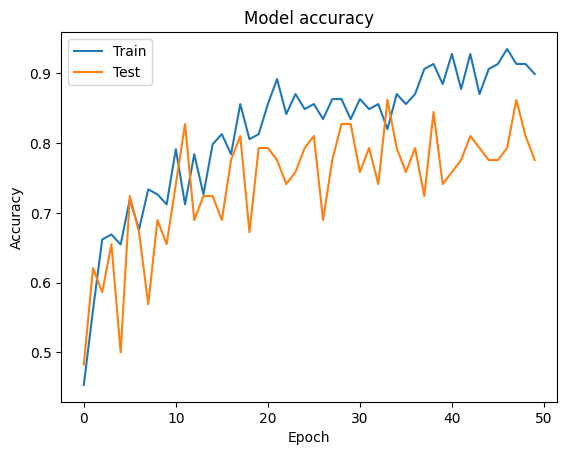

In [168]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [169]:
print(model_history.history)


{'loss': [35.30705261230469, 17.32831382751465, 16.934982299804688, 17.83395767211914, 19.205184936523438, 20.570022583007812, 20.870718002319336, 20.499353408813477, 16.380992889404297, 19.3386173248291, 11.293706893920898, 19.983497619628906, 13.279897689819336, 23.625274658203125, 15.02591609954834, 15.847535133361816, 18.44764518737793, 10.781445503234863, 17.751781463623047, 14.507729530334473, 11.35365104675293, 7.231714248657227, 12.123003959655762, 10.766121864318848, 11.73405933380127, 10.631623268127441, 12.826133728027344, 9.355019569396973, 10.89030933380127, 10.87569808959961, 8.997142791748047, 10.629834175109863, 9.704044342041016, 15.071649551391602, 10.838395118713379, 14.630727767944336, 9.209439277648926, 10.425043106079102, 9.173328399658203, 12.967188835144043, 8.798949241638184, 9.69892406463623, 8.437294006347656, 10.136114120483398, 7.836166858673096, 7.770958423614502, 3.9788687229156494, 7.6896772384643555, 7.806849479675293, 9.32231330871582], 'accuracy': [0.

In [170]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

test_set = datagen.flow_from_directory(test_path,
                                   target_size = (224, 224),
                                   batch_size = 4,
                                   class_mode = 'categorical')

train_set = datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')




Found 58 images belonging to 4 classes.
Found 139 images belonging to 4 classes.


1/1 [==============================] - 0s 59ms/step


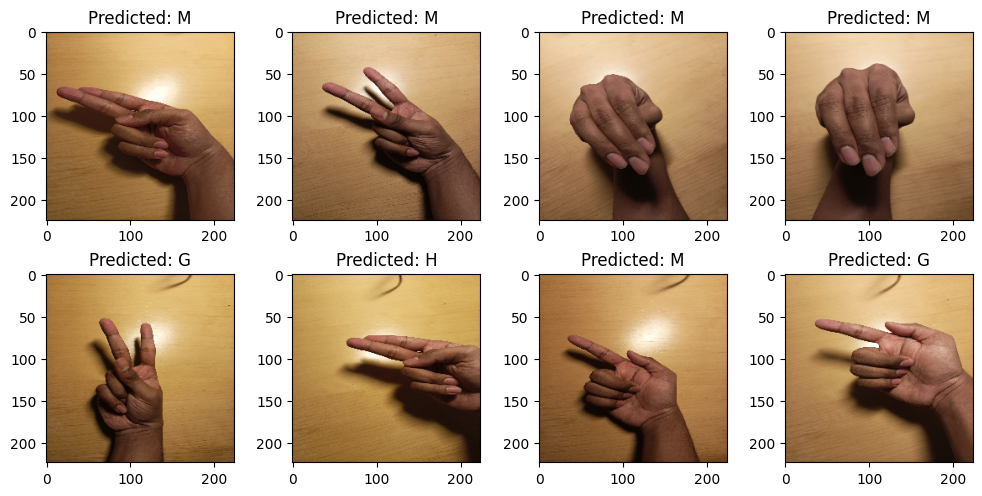

In [182]:
import matplotlib.pyplot as plt

# Get the list of image files
image_files = os.listdir('Person')

class_indices = train_set.class_indices



fig, axs = plt.subplots(2, 4, figsize=(10, 5))

for i, image_file in enumerate(image_files[:8]):
 img = load_img(os.path.join('Person', image_file), target_size=(224, 224))

 img = img_to_array(img)

 img = img / 255.0

 img = np.expand_dims(img, axis=0)

 prediction = model.predict(img)

 predicted_class = np.argmax(prediction)

 predicted_class_name = [class_name for class_name, class_index in class_indices.items() if class_index == predicted_class][0]

 # Get the original class name
 original_class_name = original_class_names[i]

 # Display the image in a subplot
 axs[i//4, i%4].imshow(img[0])
 axs[i//4, i%4].set_title('Predicted: {}'.format(predicted_class_name))

plt.tight_layout()
plt.show()



In [172]:
class_indices

{'G': 0, 'H': 1, 'K': 2, 'M': 3}

In [173]:
# from datetime import datetime
# from keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint(filepath='mymodel.h5',
#                            verbose=2, save_best_only=True)

# callbacks = [checkpoint]

# start = datetime.now()

# model_history = model.fit(
#  train_set,
#  validation_data=test_set,
#  epochs=25,
#  callbacks=callbacks,
#  verbose=2)

# duration = datetime.now() - start
# print("Training completed in time: ", duration)

In [174]:
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()
